# <b> Ψηφιακή Επεξεργασία Σημάτων</b>

## <b>2η Εργαστηριακή ΄Ασκηση</b>

<b>Ελισάβετ Λυδία Αλβανάκη, 03118167, ellialvanaki@gmail.com <br>
Δέσποινα Μουσάδη, 03118108, despinan0@gmail.com</b>

## Θέμα: Συστοιχίες Μικροφώνων (Microphone Arrays) και Πολυκαναλική Επεξεργασία Σημάτων (Multichannel Signal Processing)

<b>
Μέρος 1. Συστοιχίες Μικροφώνων και Χωρικό Φιλτράρισμα
(Spatial Filtering)</b>

Αρχικά κάνουμε import τις απαραίτητες βιβλιοθήκες:

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

1.5 Θεωρούμε ότι το σήμα φτάνει στη συστοιχία μικροφώνων από γωνία 90 μοιρών και σχεδιάζουμε το beam pattern του delay-and-sum beamformer σε λογαριθμική κλίμακα για συχνότητα f=2000Hz και συναρτήσει της γωνίας θ.

1. Σχεδιάζουμε μία γραφική για d=4cm και Ν=4,8,26

In [2]:
d = 0.04
N = 4
c = 343
freq = 2000
omega = 2 * math.pi * freq
theta = np.linspace(0,math.pi,1000)
N = 4



In [3]:
B = (1/N)*(np.sin((N/2)*(omega/c)*d*np.cos(theta))/np.sin((1/2)*(omega/c)*d*np.cos(theta)))

<ipython-input-4-03862ee76f13>:11: RuntimeWarning: invalid value encountered in log10
  B_dB = 10*np.log10(B)
<ipython-input-4-03862ee76f13>:17: RuntimeWarning: invalid value encountered in log10
  B_dB = 10*np.log10(B)


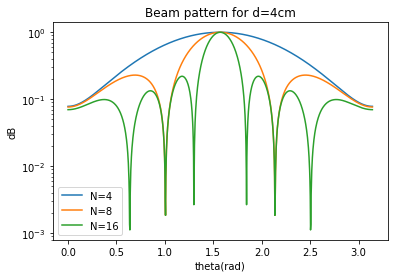

In [4]:
B_dB = 10*np.log10(B)
plt.figure()
plt.title("Beam pattern for d=4cm")
plt.xlabel("theta(rad)")
plt.ylabel("dB")
plt.semilogy( theta,abs(B),label="N=4")

N = 8
d = 0.04
B = (1/N)*(np.sin((N/2)*(omega/c)*d*np.cos(theta))/np.sin((1/2)*(omega/c)*d*np.cos(theta)))
B_dB = 10*np.log10(B)
plt.semilogy( theta,abs(B),label="N=8")

N = 16
d = 0.04
B = (1/N)*(np.sin((N/2)*(omega/c)*d*np.cos(theta))/np.sin((1/2)*(omega/c)*d*np.cos(theta)))
B_dB = 10*np.log10(B)
plt.semilogy( theta,abs(B),label="N=16")



plt.legend()

plt.show()

Με τη χρήση του delay-and-sum beamformer μας ενδιαφέρει να απομονώσουμε το επιθυμητό σήμα που έρχεται από γωνία 90 μοιρών στη συγκεκριμένη περίπτωση. Αυτό είναι περισσότερο εφικτό όσο πιο στενός είναι ο κύριος λοβός (στις 90 μοίρες) και όσο πιο μικρό πλάτος έχουν οι περιφερειακοί λοβοί, καθώς μπορούμε να απομονώσουμε το σήμα που έρχεται από τη συγκεκριμένη γωνία μαζί με ελάχιστο θόρυβο. Παρατηρούμε ότι όσο μεγαλώνει το Ν, τόσο πιο καλή είναι η απόδοση του beamformer. Σε αυτό το παράδειγμα, θα έχουμε στην έξοδο σήμα πιο κοντά στο επιθυμητό για Ν=16.

2. Σχεδιάζουμε τη γραφική του beam pattern συναρτήσει της γωνίας θ για Ν=8 και d=4cm,8cm,16cm

<ipython-input-5-b21a4ca2b0e0>:4: RuntimeWarning: invalid value encountered in log10
  B_dB = 10*np.log10(B)
<ipython-input-5-b21a4ca2b0e0>:15: RuntimeWarning: invalid value encountered in log10
  B_dB = 10*np.log10(B)
<ipython-input-5-b21a4ca2b0e0>:21: RuntimeWarning: invalid value encountered in log10
  B_dB = 10*np.log10(B)


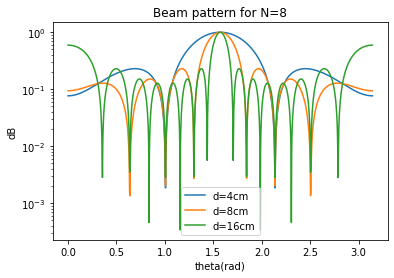

In [5]:
N = 8
d = 0.04
B = (1/N)*(np.sin((N/2)*(omega/c)*d*np.cos(theta))/np.sin((1/2)*(omega/c)*d*np.cos(theta)))
B_dB = 10*np.log10(B)
plt.figure()
plt.title("Beam pattern for N=8")
plt.xlabel("theta(rad)")
plt.ylabel("dB")

plt.semilogy( theta,abs(B),label="d=4cm")

N = 8
d = 0.08
B = (1/N)*(np.sin((N/2)*(omega/c)*d*np.cos(theta))/np.sin((1/2)*(omega/c)*d*np.cos(theta)))
B_dB = 10*np.log10(B)
plt.semilogy( theta,abs(B),label="d=8cm")

N = 8
d = 0.16
B = (1/N)*(np.sin((N/2)*(omega/c)*d*np.cos(theta))/np.sin((1/2)*(omega/c)*d*np.cos(theta)))
B_dB = 10*np.log10(B)
plt.semilogy( theta,abs(B),label="d=16cm")

plt.legend()



plt.show()

Παρατηρούμε ότι όσο μεγαλύτερη είναι η απόσταση ανάμεσα στα μικρόφωνα, τόσο πιο στενός είναι ο κεντρικός λοβός, άρα έχουμε καλύτερη απομόνωση του σήματος που έρχεται από τις 90 μοίρες. Ωστόσο, βλέπουμε ότι οι λοβοί στα πλάγια αυξάνονται σε πλάτος όσο μεγαλώνει η απόσταση, άρα ο beamformer θα ενισχύσει το σήμα που προέρχεται από γωνίες κοντά στο 0 και στο π. Συνεπώς, σε αυτή την περίπτωση, αν έχουμε θόρυβο και από αυτές τις γωνίες, θα ήταν καλύτερο να επιλέξουμε μια μέση λύση, ώστε να ενισχύεται μόνο το επιθυμητό σήμα.

3. Θεωρούμε ότι η συστοιχία αποτελείται από N = 8 μικρόφωνα με απόσταση d = 8cm και το σήμα επιθυμητό καταφθάνει υπό γωνία 90 μοιρών. Αναπαριστούμε το πλάτος του beam pattern για γωνίες άφιξης σημάτων θ=0,45,60 συναρτήσει της συχνότητας f στο διάστημα [0kHz,8kHz]

<ipython-input-6-0998f7ae3a21>:6: RuntimeWarning: invalid value encountered in true_divide
  B = (1/N)*(np.sin((N/2)*(omega/c)*d*np.cos(theta))/np.sin((1/2)*(omega/c)*d*np.cos(theta)))
<ipython-input-6-0998f7ae3a21>:7: RuntimeWarning: invalid value encountered in log10
  B_dB = 10*np.log10(B)
<ipython-input-6-0998f7ae3a21>:20: RuntimeWarning: invalid value encountered in true_divide
  B = (1/N)*(np.sin((N/2)*(omega/c)*d*np.cos(theta))/np.sin((1/2)*(omega/c)*d*np.cos(theta)))
<ipython-input-6-0998f7ae3a21>:21: RuntimeWarning: invalid value encountered in log10
  B_dB = 10*np.log10(B)
<ipython-input-6-0998f7ae3a21>:28: RuntimeWarning: invalid value encountered in true_divide
  B = (1/N)*(np.sin((N/2)*(omega/c)*d*np.cos(theta))/np.sin((1/2)*(omega/c)*d*np.cos(theta)))
<ipython-input-6-0998f7ae3a21>:29: RuntimeWarning: invalid value encountered in log10
  B_dB = 10*np.log10(B)


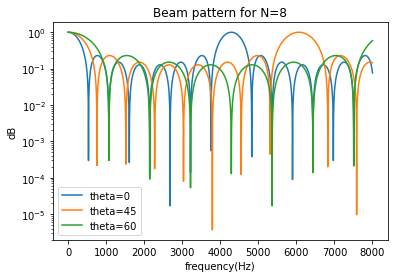

In [6]:
N = 8
d = 0.08
theta = 0
freq = np.linspace(0,8000,10000)
omega = 2 * 3.14 *freq
B = (1/N)*(np.sin((N/2)*(omega/c)*d*np.cos(theta))/np.sin((1/2)*(omega/c)*d*np.cos(theta)))
B_dB = 10*np.log10(B)


plt.figure()
plt.title("Beam pattern for N=8")
plt.xlabel("frequency(Hz)")
plt.ylabel("dB")

plt.semilogy( freq,abs(B),label="theta=0")

theta = np.pi/4
freq = np.linspace(0,8000,10000)
omega = 2 * 3.14 *freq
B = (1/N)*(np.sin((N/2)*(omega/c)*d*np.cos(theta))/np.sin((1/2)*(omega/c)*d*np.cos(theta)))
B_dB = 10*np.log10(B)
plt.semilogy( freq,abs(B), label="theta=45")


theta = np.pi/3
freq = np.linspace(0,8000,10000)
omega = 2 * 3.14 *freq
B = (1/N)*(np.sin((N/2)*(omega/c)*d*np.cos(theta))/np.sin((1/2)*(omega/c)*d*np.cos(theta)))
B_dB = 10*np.log10(B)
plt.semilogy( freq,abs(B),label="theta=60")

plt.legend()


plt.show()


Παρατηρούμε ότι μεταβάλλοντας τις γωνίες, μετατοπίζονται οι κύριοι λοβοί και επομένως η συχνότητα του σήματος που θα ενισχυθεί.